# Model training to predict bike trips in cities SJ, SF, MV, RE

In [45]:
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso

In [46]:
# Function to plot the prediced values against the actual values
def plot_actual_vs_predicted(actual, predicted, legend_arr=None):
    figure, ax = plt.subplots()
    ax.scatter(actual, predicted, edgecolors=(0, 0, 0), color='g')
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    if(legend_arr is not None):
        ax.legend(legend_arr)
    ax.set_ylabel(legend_arr)
    plt.show()

In [47]:
# Reading the training data
train_sf = pd.read_csv('../data/prepped/train_main_sf.csv')
train_mv = pd.read_csv('../data/prepped/train_main_mv.csv')
train_sj = pd.read_csv('../data/prepped/train_main_sj.csv')
train_re = pd.read_csv('../data/prepped/train_main_re.csv')

In [48]:
train_sf.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,wind_dir_degrees,zip_code,fog_x,fog_rain_x,rain_x,rain_thunderstorm_x,fog_y,fog_rain_y,rain_y,rain_thunderstorm_y
0,0,0,8,1,56.0,49.0,41.0,45.0,40.0,36.0,...,290.0,94107,0,0,0,0,0,0,0,0
1,0,0,8,1,56.0,47.0,38.0,27.0,20.0,14.0,...,40.0,94107,0,0,0,0,0,0,0,0
2,0,0,8,0,60.0,54.0,48.0,48.0,46.0,43.0,...,310.0,94107,0,0,0,0,0,0,0,0
3,0,0,9,0,60.0,54.0,47.0,52.0,49.0,45.0,...,280.0,94107,1,0,0,0,1,0,0,0
4,0,0,9,1,58.0,52.0,46.0,51.0,46.0,42.0,...,281.0,94107,0,0,0,0,0,0,0,0


In [49]:
train_mv.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0,0,8,1,59.0,46.0,34.0,44.0,36.0,28.0,...,14.0,2.0,14.0,0.0,0.0,348.0,94041,0,0,0
1,0,0,8,1,54.0,43.0,32.0,28.0,24.0,16.0,...,14.0,2.0,16.0,0.0,0.0,311.0,94041,0,0,0
2,0,0,8,0,63.0,49.0,40.0,50.0,41.0,34.0,...,14.0,1.0,14.0,0.0,2.0,350.0,94041,0,0,0
3,0,0,9,0,60.0,53.0,46.0,50.0,47.0,45.0,...,8.0,2.0,8.0,0.0,2.0,301.0,94041,0,0,0
4,0,0,9,1,59.0,49.0,43.0,50.0,42.0,37.0,...,20.0,1.0,20.0,0.0,3.0,261.0,94041,0,0,0


In [50]:
train_re.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0,0,8,1,55.0,47.0,39.0,45.0,38.0,36.0,...,6.0,0.0,6.0,0.0,1.0,54.0,94063,0,0,0
1,0,0,8,1,55.0,46.0,37.0,32.0,26.0,18.0,...,8.0,2.0,8.0,0.0,1.0,314.0,94063,0,0,0
2,0,0,8,0,59.0,52.0,44.0,50.0,44.0,39.0,...,7.0,2.0,7.0,0.0,2.0,342.0,94063,0,0,0
3,0,0,9,0,59.0,54.0,48.0,54.0,48.0,46.0,...,7.0,3.0,7.0,0.0,3.0,325.0,94063,0,0,0
4,0,0,9,1,57.0,50.0,44.0,50.0,45.0,41.0,...,8.0,2.0,8.0,0.0,4.0,269.0,94063,0,0,0


In [51]:
train_sj.head()

,holiday,business_day,month,weekday,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,...,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,wind_dir_degrees,zip_code,fog,fog_rain,rain
0,0,0,8,1,62.0,49.0,35.0,36.0,34.0,32.0,...,8.0,1.0,10.0,0.0,2.0,310.0,95113,0,0,0
1,0,0,8,1,53.0,42.0,30.0,27.0,23.0,18.0,...,8.0,3.0,10.0,0.0,0.0,129.0,95113,0,0,0
2,0,0,8,0,62.0,52.0,41.0,48.0,43.0,37.0,...,8.0,2.0,13.0,0.0,3.0,297.0,95113,0,0,0
3,0,0,9,0,61.0,54.0,46.0,50.0,47.0,44.0,...,9.0,2.0,10.0,0.0,4.0,293.0,95113,0,0,0
4,0,0,9,1,59.0,51.0,43.0,50.0,44.0,40.0,...,20.0,3.0,24.0,0.0,4.0,349.0,95113,0,0,0


In [52]:
# Loading the labels from csv
labels_sf = pd.read_csv('../data/prepped/labels_sf.csv')
labels_mv = pd.read_csv('../data/prepped/labels_mv.csv')
labels_sj = pd.read_csv('../data/prepped/labels_sj.csv')
labels_re = pd.read_csv('../data/prepped/labels_re.csv')

#### Now that we have the training datasets, we will create validation sets 

In [53]:
# Split train and test data
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(train_sf, labels_sf, test_size=0.2, random_state=42)
X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(train_mv, labels_mv, test_size=0.2, random_state=42)
X_train_sj, X_test_sj, y_train_sj, y_test_sj = train_test_split(train_sj, labels_sj, test_size=0.2, random_state=42)
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(train_re, labels_re, test_size=0.2, random_state=42)


## Trying the RandomForestRegressor

In [54]:
rndForestReg = RandomForestRegressor(n_estimators=50, min_samples_leaf=3, random_state=42, bootstrap=False)
preds = cross_val_predict(rndForestReg, X_train_sf, y_train_sf, cv=20)

c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y wa

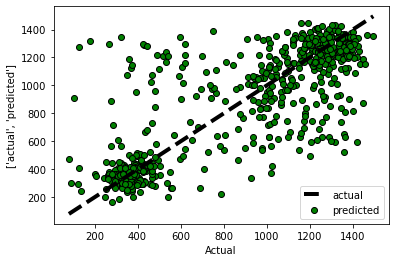

In [55]:
# Plotting the predicted values against the actual values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [56]:
# Get the rmse score
scores_rf = cross_val_score(rndForestReg, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=15)
rmse_scores_rf = np.sqrt(-scores_rf)

c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [57]:
print("Mean:", rmse_scores_rf.mean())

Mean: 244.93066578416932


## Now trying ExtraTrees Regressor

In [58]:
# Training the EXT trees regressor model
extTreesReg = ExtraTreesRegressor(n_estimators=50, min_samples_leaf=3, random_state=42, bootstrap=False)
preds = cross_val_predict(extTreesReg, X_train_sf, y_train_sf, cv=20)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:862: DataConversionWarning: A column-vector y wa

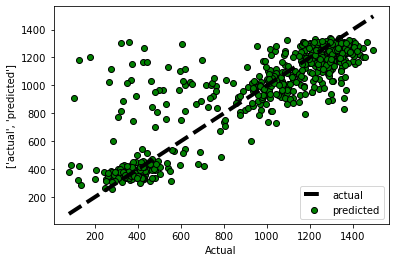

In [59]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [60]:
# Print the rmse score
scores_ext = cross_val_score(extTreesReg, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_ext = np.sqrt(-scores_ext)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [61]:
print("Mean:", rmse_scores_ext.mean())

Mean: 190.85381124146784


## Now trying XG Boost Regression

In [62]:
# Training the XG Boost regressor moddel
xgbr = XGBRegressor(n_estimators=50, random_state=42, bootstrap=False)
preds = cross_val_predict(xgbr, X_train_sf, y_train_sf, cv=20)

[13:09:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:03] WARNI

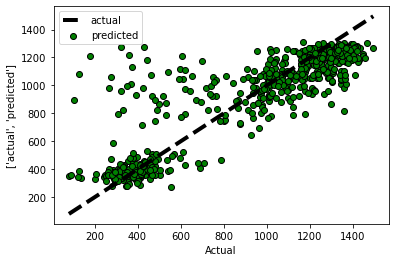

In [63]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [64]:
# Print the rmse score
scores_xgb = cross_val_score(xgbr, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_xgb = np.sqrt(-scores_xgb)


[13:09:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:04] WARNI

In [65]:
print("Mean:", rmse_scores_xgb.mean())

Mean: 190.07682660893977


## Now trying the KNN regressor

In [66]:
# Training the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
preds = cross_val_predict(knn, X_train_sf, y_train_sf, cv=20)


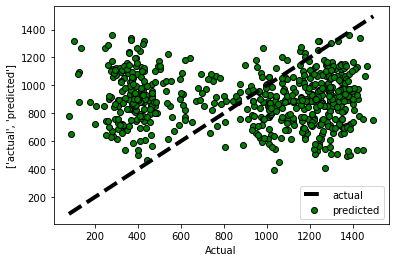

In [67]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [68]:
# Print the rmse score
scores_knn = cross_val_score(knn, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_knn = np.sqrt(-scores_knn)

print("Mean:", rmse_scores_knn.mean())

Mean: 452.83107968791774


## Trying out Lasso regression

In [69]:
# Training the Lasso model
lasso = Lasso(alpha=0.1)
preds = cross_val_predict(lasso, X_train_sf, y_train_sf, cv=20)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9267021.917359233, tolerance: 9074.698577517987
  model = cd_fast.enet_coordinate_descent(
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8322260.319106993, tolerance: 9282.757813669064
  model = cd_fast.enet_coordinate_descent(
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7521431.898318457, tolerance: 9109.59011294964
  model = cd_fast.enet_coordinate_descent(
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

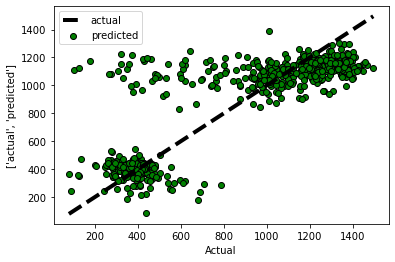

In [70]:
# Plot the actual vs predicted values
plot_actual_vs_predicted(y_train_sf, preds, ['actual', 'predicted'])

In [71]:
# Print the rmse score
scores_lasso = cross_val_score(lasso, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
rmse_scores_lasso = np.sqrt(-scores_lasso)


c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9267021.917359233, tolerance: 9074.698577517987
  model = cd_fast.enet_coordinate_descent(
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8322260.319106993, tolerance: 9282.757813669064
  model = cd_fast.enet_coordinate_descent(
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7521431.898318457, tolerance: 9109.59011294964
  model = cd_fast.enet_coordinate_descent(
c:\Users\akaid\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

In [72]:

print("Mean:", rmse_scores_lasso.mean())

Mean: 228.4479173644267


### Observations:

| Model Used | RMSE score | Comment |
| --- | ----------- | ------------------------- |
| RandomForestRegressor | Mean: 244.93066578416932 | Relatively poor performance on the dataset |
| ExtraTreesRegressor | Mean: 190.85381124146784 | Good performance |
| XGBoostRegressor | Mean: 190.07682660893977 | Good performance, better than EXT |
| KNNRegressor | Mean: 452.83107968791774 | Worst performance |
| LassoRegression | Mean: 228.4479173644267 | Relatively poor performance |

ExtraTreesRegressor and XGBoostRegressor seem to be performing the highest in this case.


#### **We will choose XGBoostRegressor because it seems to be the highest performing algorithm**

Now, we have a baseline for what model we want to use. Now, we will try hyperparameter tuning for the model

#### Tuning for n_estimators

In [73]:
# Training the xgboost model
n_estimators_xgb = [10,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
result_list = list()
for n in n_estimators_xgb:
    xgbr = XGBRegressor(n_estimators=n, random_state=42, bootstrap=False)
    preds = cross_val_predict(xgbr, X_train_sf, y_train_sf, cv=20)
    scores_xgb = cross_val_score(xgbr, X_train_sf, y_train_sf, scoring="neg_mean_squared_error", cv=20)
    rmse_scores_xgb = np.sqrt(-scores_xgb)
    result_list.append(rmse_scores_xgb.mean())


[13:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:09:06] WARNI

Text(0.5, 1.0, 'For XGBoost')

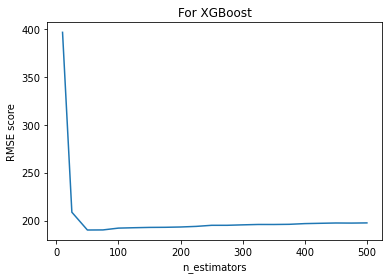

In [ ]:
scores = [i for i in result_list]

plt.plot(n_estimators_xgb, scores)
plt.ylabel("RMSE score")
plt.xlabel("n_estimators")
plt.title("For XGBoost")

Here, we can see that RMSE score is lowest for about n_estimators=50. So we will proceed with that value

### Now, we will train the model with decided params. for each city.

In [ ]:
# Train xgbr model for all cities
xgbr = XGBRegressor(n_estimators=50, random_state=42, bootstrap=False)

# San Francisco
xgbr.fit(X_train_sf, y_train_sf)
preds_sf = xgbr.predict(X_test_sf)

# San Jose
xgbr.fit(X_train_sj, y_train_sj)
preds_sj = xgbr.predict(X_test_sj)

# Mountain View
xgbr.fit(X_train_mv, y_train_mv)
preds_mv = xgbr.predict(X_test_mv)

# Redwood City
xgbr.fit(X_train_re, y_train_re)
preds_re = xgbr.predict(X_test_re)


[12:55:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Function to plot the actual vs predicted values
def plot_preds(y_test, preds, cityName):
    plt.figure(figsize=(20,10))
    plt.plot(preds, color='red')
    plt.plot(y_test, color='blue')
    plt.legend(['Prediction', 'Acutal'])
    plt.ylabel("Number of Trips")
    plt.xlabel("Predicted Date")
    plt.title("Predicted Values vs Actual Values for {}".format(cityName))
    plt.show()

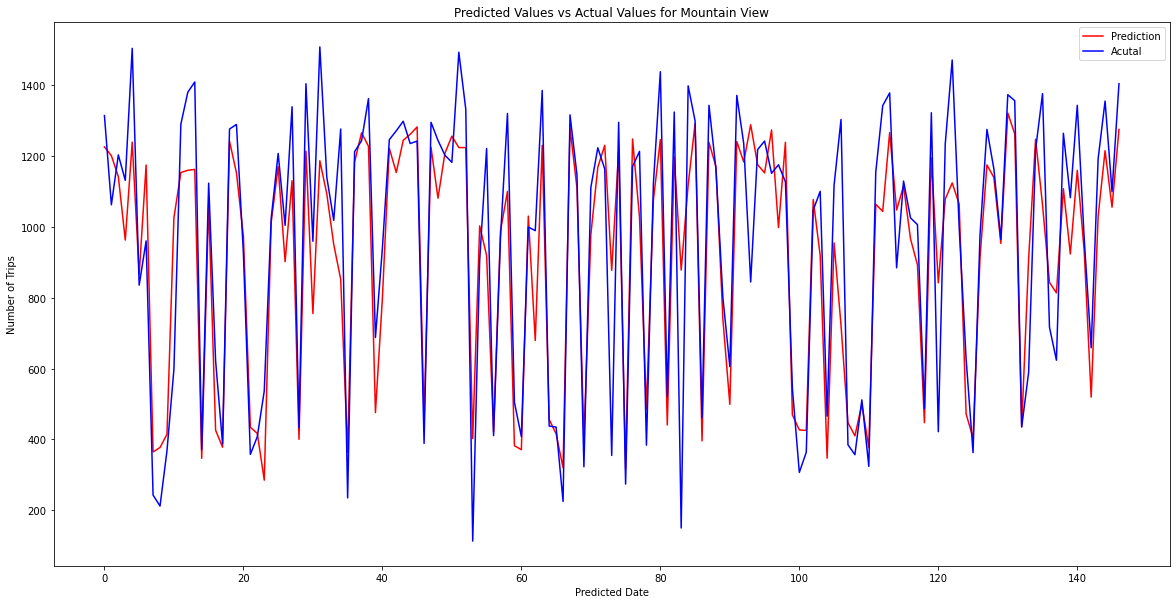

In [ ]:
# Plotting the predicted values for San Francisco
plot_preds(y_test_mv, preds_mv, "Mountain View")

Hmmmmmm, something went wrong here. 

In [ ]:
y_test_mv.head()

,trip_count
0,1315
1,1063
2,1204
3,1132
4,1505


I think we need to reset the index as all the values seem to be out of place.

In [ ]:
y_test_mv.reset_index(drop = True, inplace = True)
y_test_mv.head()

,trip_count
0,1315
1,1063
2,1204
3,1132
4,1505


In [ ]:
y_test_mv.reset_index(drop = True, inplace = True)
y_test_sf.reset_index(drop = True, inplace = True)
y_test_sj.reset_index(drop = True, inplace = True)
y_test_re.reset_index(drop = True, inplace = True)


# Violla !!!!!!!!!!!!!!!!!!!!!!!!!!!!

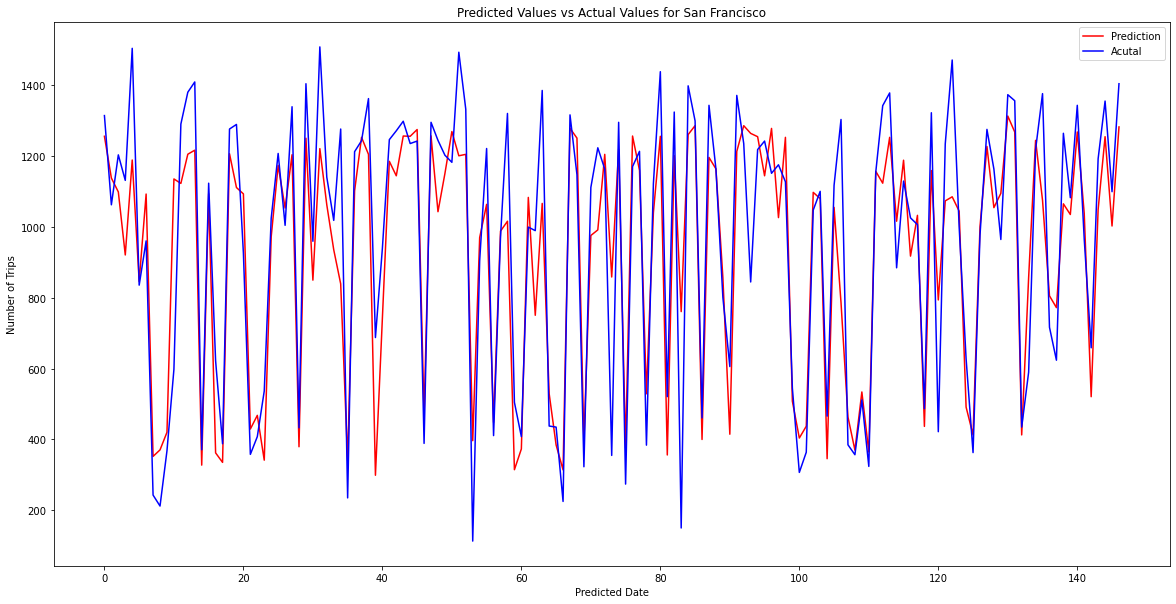

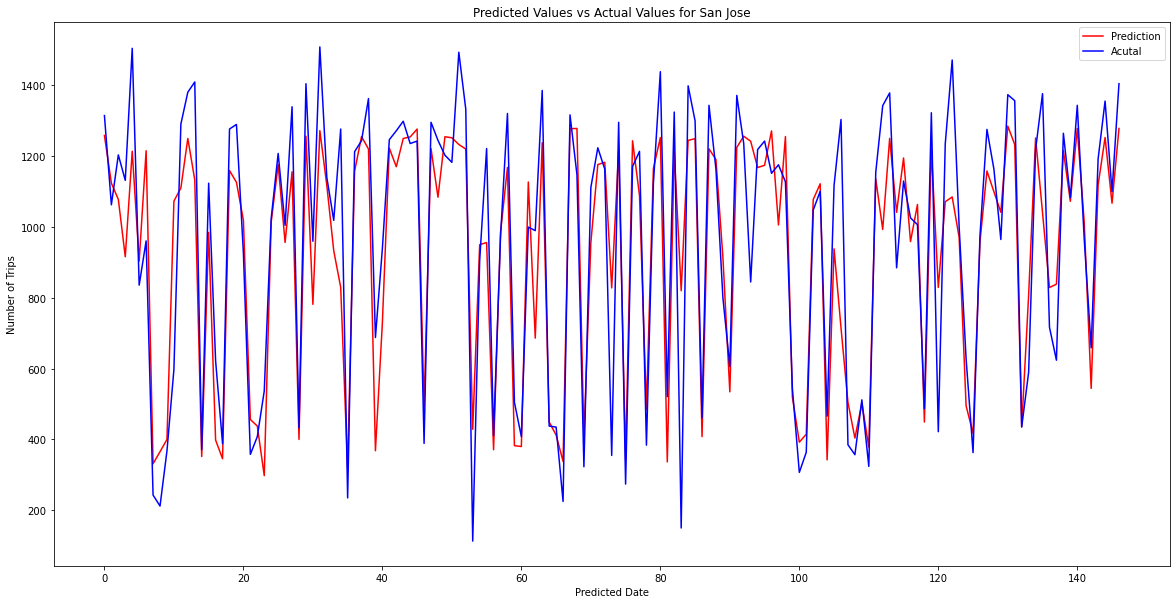

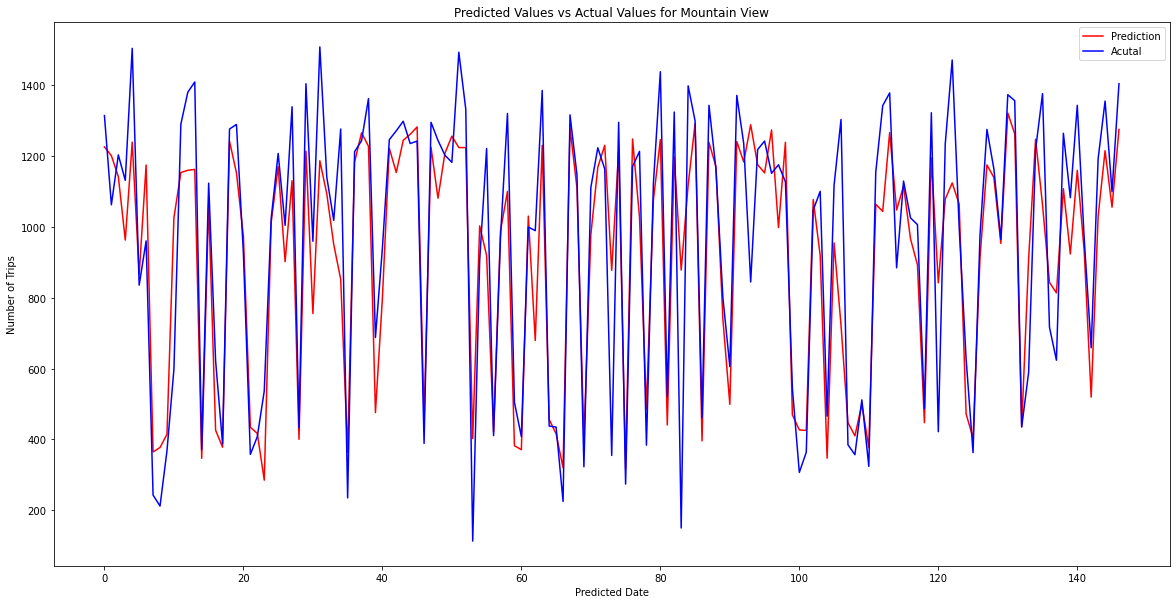

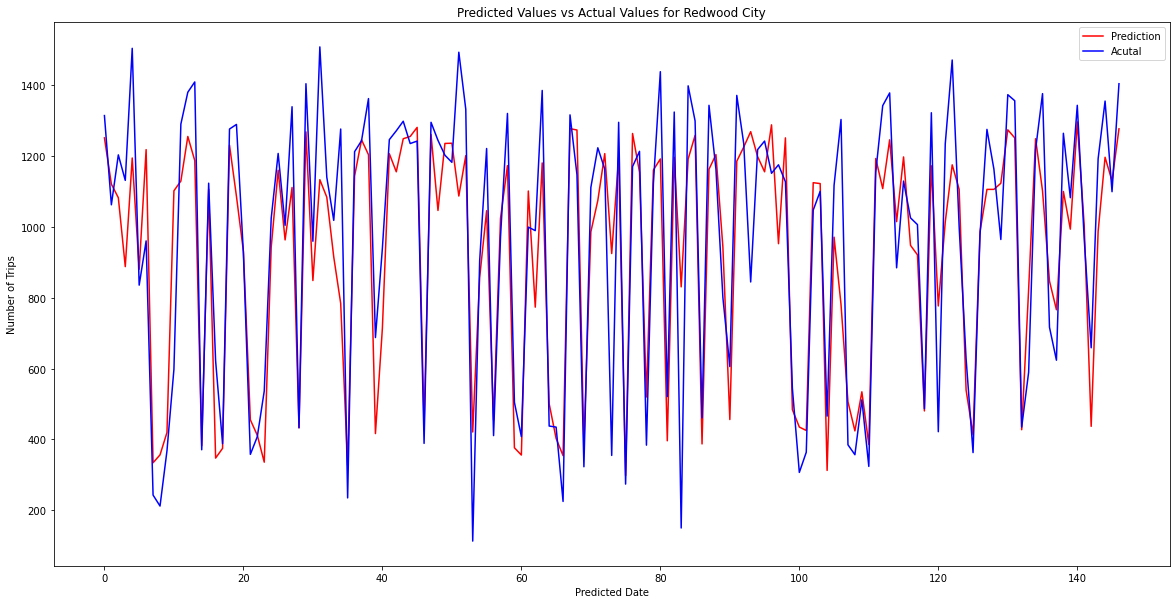

In [ ]:
# Plot the preds for each city
plot_preds(y_test_sf, preds_sf, "San Francisco")
plot_preds(y_test_sj, preds_sj, "San Jose")
plot_preds(y_test_mv, preds_mv, "Mountain View")
plot_preds(y_test_re, preds_re, "Redwood City")